In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *

In [2]:
bs = 64

In [3]:
path_base = untar_data(URLs.PETS)
path = path_base/'images'

In [4]:
csv_name = 'labels.csv'

In [5]:
import pandas as pd
df = pd.read_csv(path_base/csv_name)
df.head()

,name,label
0,images/Siamese_87.jpg,Siamese
1,images/chihuahua_126.jpg,chihuahua
2,images/german_shorthaired_97.jpg,german_shorthaired
3,images/Bombay_157.jpg,Bombay
4,images/Bengal_12.jpg,Bengal


Populating the interactive namespace from numpy and matplotlib


/home/CW01/uia94835/miniconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['pad', 'partition', 'uniform', 'array', 'random', 'copy', '__version__', 'subplots']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


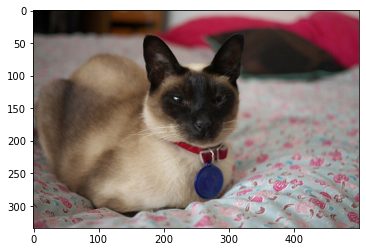

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread(path/'Siamese_87.jpg')
imgplot = plt.imshow(img)
plt.show()

In [7]:
tfms = get_transforms()

In [8]:
np.random.seed(2)

In [9]:
src = ImageList.from_csv(path_base, csv_name=csv_name).split_by_rand_pct(0.4, seed=2).label_from_df(cols='label')

In [10]:
def get_data(size, bs, padding_mode='reflection'):
    return (src.transform(tfms, size=size, padding_mode=padding_mode)
           .databunch(bs=bs).normalize(imagenet_stats))

In [11]:
data = get_data(224, bs)

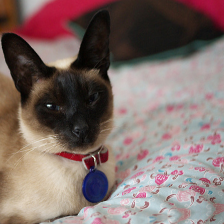

In [12]:
src.train[0][0]

In [13]:
src.train[0][1]

Category Siamese

In [14]:
gc.collect()

70

### ResNet18

In [15]:
learn = cnn_learner(data, models.resnet18, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=True)

In [16]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


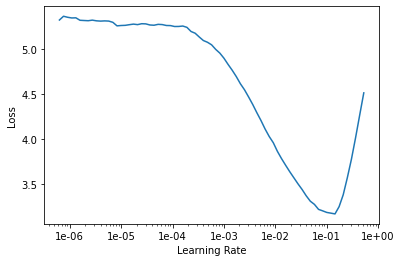

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.416910,0.561754,0.179635,00:10
1,0.987953,0.372598,0.115020,00:10
2,0.612584,0.384382,0.118403,00:10
3,0.457320,0.367134,0.116712,00:10
4,0.362370,0.339999,0.099797,00:11
5,0.276950,0.308687,0.093708,00:12
6,0.227715,0.312642,0.095399,00:10
7,0.221284,0.309020,0.094384,00:10


In [20]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.201327,0.300602,0.091678,00:11
1,0.185616,0.302436,0.095737,00:12
2,0.174408,0.297672,0.092355,00:11


In [21]:
learn.save('basetrain-res18-lr3e3_1e61e4-ep8_3-pretrain')

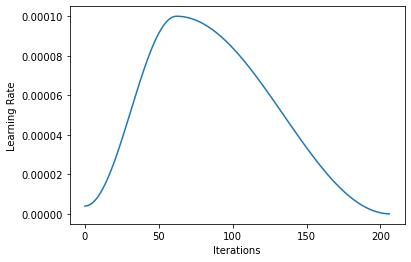

In [22]:
learn.recorder.plot_lr()

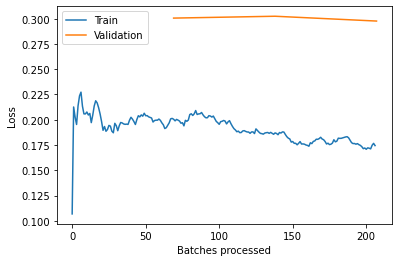

In [23]:
learn.recorder.plot_losses()

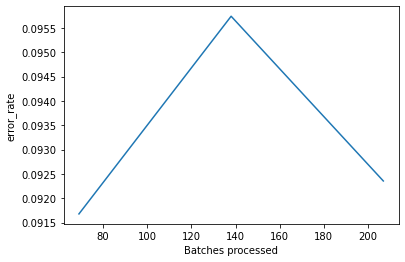

In [24]:
learn.recorder.plot_metrics()

In [25]:
learn.validate()

[0.29767224, tensor(0.0924)]

In [26]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

### ResNet34

In [27]:
learn = cnn_learner(data, models.resnet34, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=True)

In [28]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,2.336326,0.449430,0.143775,00:13
1,0.926549,0.311022,0.106225,00:13
2,0.550528,0.324653,0.101150,00:14
3,0.398706,0.287523,0.088972,00:14
4,0.296660,0.278058,0.091001,00:14
5,0.219809,0.261062,0.079838,00:14
6,0.195618,0.255215,0.078823,00:14
7,0.160050,0.252960,0.078146,00:14


In [29]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.157784,0.247019,0.076455,00:18
1,0.145265,0.245056,0.075101,00:17
2,0.140154,0.250352,0.076455,00:18


In [30]:
learn.save('basetrain-res34-lr3e3_1e61e4-ep8_3-pretrain')

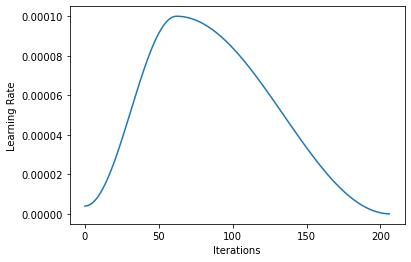

In [31]:
learn.recorder.plot_lr()

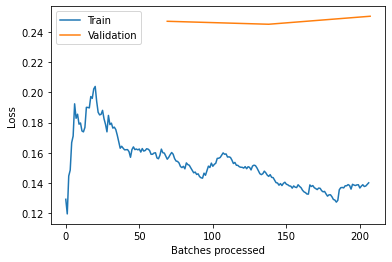

In [32]:
learn.recorder.plot_losses()

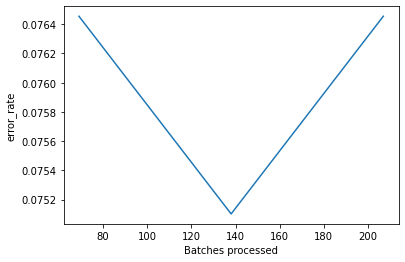

In [33]:
learn.recorder.plot_metrics()

In [34]:
learn.validate()

[0.25035203, tensor(0.0765)]

In [35]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

### ResNet50

In [36]:
learn = cnn_learner(data, models.resnet50, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=True)

In [37]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.237221,0.329008,0.105210,00:28
1,0.605912,0.321816,0.095399,00:27
2,0.414099,0.303478,0.091340,00:26
3,0.311001,0.288175,0.086942,00:27
4,0.229643,0.246429,0.077470,00:26
5,0.154828,0.264876,0.078823,00:27
6,0.120816,0.243589,0.071719,00:26
7,0.092758,0.244125,0.071042,00:26


In [38]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.090781,0.238630,0.070365,00:34
1,0.084869,0.231766,0.068674,00:33
2,0.075821,0.233704,0.069689,00:33


In [39]:
learn.save('basetrain-res50-lr3e3_1e61e4-ep8_3-pretrain')

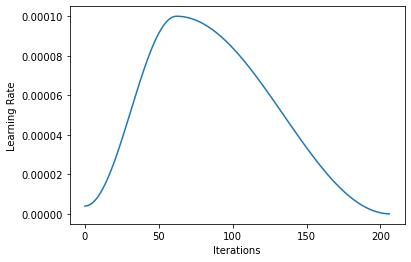

In [40]:
learn.recorder.plot_lr()

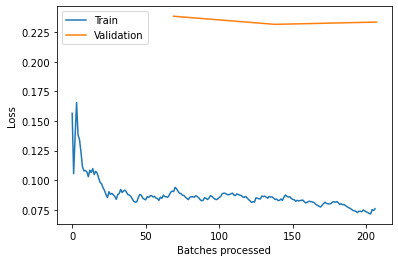

In [41]:
learn.recorder.plot_losses()

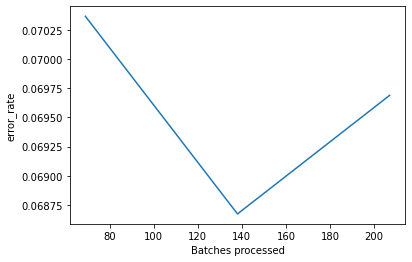

In [42]:
learn.recorder.plot_metrics()

In [43]:
learn.validate()

[0.23370352, tensor(0.0697)]

In [44]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0

### ResNet101

In [45]:
learn = cnn_learner(data, models.resnet101, loss_func = nn.CrossEntropyLoss(), metrics=error_rate, pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /home/CW01/uia94835/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 170M/170M [04:27<00:00, 668kB/s]  


In [46]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.140020,0.275291,0.089648,00:37
1,0.567478,0.289339,0.087280,00:37
2,0.396988,0.277289,0.079161,00:40
3,0.260884,0.256521,0.073072,00:39
4,0.195189,0.241909,0.069689,00:39
5,0.152740,0.236452,0.070704,00:39
6,0.116898,0.211938,0.061231,00:40
7,0.087477,0.216400,0.060893,00:39


In [47]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.081407,0.212332,0.059202,00:51
1,0.073297,0.211240,0.061570,00:51
2,0.059971,0.209834,0.059202,00:51


In [48]:
learn.save('basetrain-res101-lr3e3_1e61e4-ep8_3-pretrain')

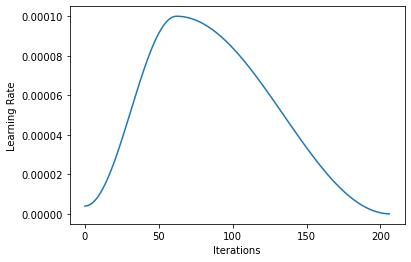

In [49]:
learn.recorder.plot_lr()

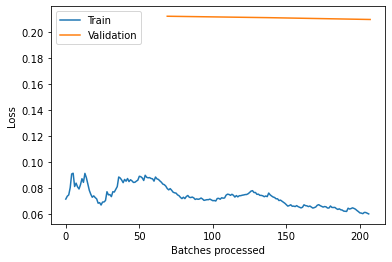

In [50]:
learn.recorder.plot_losses()

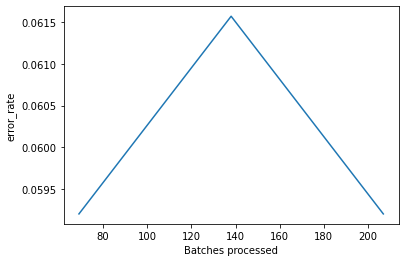

In [51]:
learn.recorder.plot_metrics()

In [52]:
learn.validate()

[0.20983411, tensor(0.0592)]

In [53]:
learn.destroy()
gc.collect()

this Learner object self-destroyed - it still exists, but no longer usable


0